<font size="6"><b>LEAF CLASSIFICATION<b></font>

Submitted by KRISTINE ANN M. CARANDANG | MSDS 2022 | March 2022

In [4]:
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import closing
from skimage.measure import label, regionprops, regionprops_table
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# for scoring
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import make_scorer
import scipy.stats as stats
from tqdm import notebook
import time
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from tqdm import notebook
from skimage import data, measure
import os

In [14]:
imagepaths = os.listdir('Leaves')
print('Number of items: ',len(imagepaths))

Number of items:  27


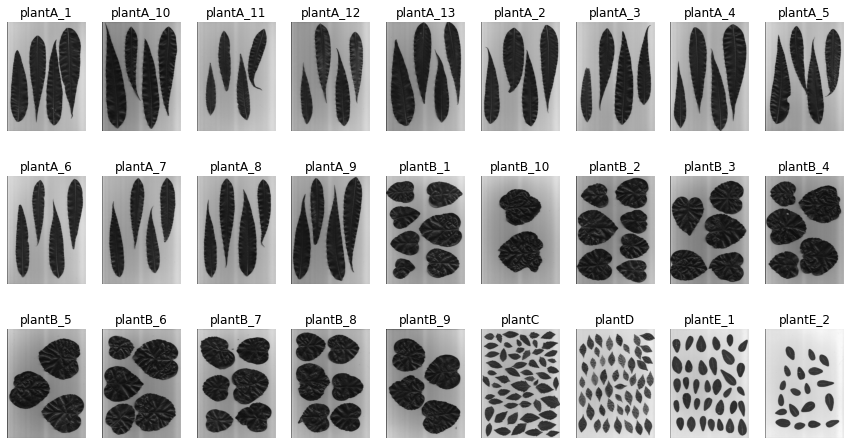

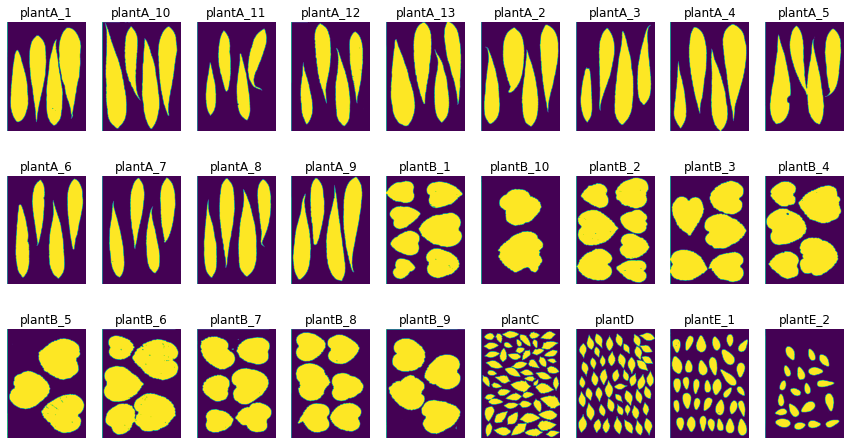

In [35]:
fig, axes = plt.subplots(3, 9, figsize=(15,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(imread('Leaves/' + images[i]))
    ax.set_title(images[i][:-4])
    ax.axis('off')
    
fig, axes = plt.subplots(3, 9, figsize=(15,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(closing(rgb2gray(imread('Leaves/' + images[i])) < threshold_otsu(rgb2gray(imread('Leaves/' + images[i])))))
    ax.set_title(images[i][:-4])
    ax.axis('off')

In [3]:
imagepaths = os.listdir('Leaves')
images = [imread('Leaves/' + path) for path in imagepaths]

In [152]:
conso = pd.DataFrame()
for i in range(len(imagepaths)):
    image = rgb2gray(imread('Leaves/' + imagepaths[i]))
    cleaned = closing(image <= threshold_otsu(image))
    labeled = label(cleaned*1)
    
    a = pd.DataFrame(measure.regionprops_table(labeled, properties=properties))
    a['label'] = imagepaths[i][:6]
    conso = pd.concat([conso, a], axis=0)
display(conso)

,area,perimeter_crofton,solidity,major_axis_length,minor_axis_length,extent,eccentricity,feret_diameter_max,moments-0-0,moments-0-1,...,moments-1-3,moments-2-0,moments-2-1,moments-2-2,moments-2-3,moments-3-0,moments-3-1,moments-3-2,moments-3-3,label
0,2879,1675.327891,0.821632,1032.481135,3.775043,0.821632,0.999993,876.005137,2879.0,3381.0,...,4.323456e+06,6.772025e+08,6.894660e+08,1.173637e+09,2.178769e+09,4.423515e+11,4.457710e+11,7.497908e+11,1.368089e+12,plantA
1,81173,1567.713156,0.939731,646.704709,167.620388,0.630931,0.965826,731.790271,81173.0,7258843.0,...,2.732765e+13,8.784987e+09,8.200972e+11,8.737432e+13,1.006823e+16,3.846377e+12,3.650088e+14,3.841331e+16,4.318117e+18,plantA
2,57763,1449.210513,0.953704,611.677454,127.523064,0.620241,0.978026,695.184148,57763.0,3782365.0,...,6.842411e+12,5.540825e+09,3.517845e+11,2.612194e+13,2.164145e+15,2.299039e+12,1.437196e+14,1.020806e+16,8.011039e+17,plantA
3,60037,1468.536493,0.938665,641.765340,124.152673,0.659168,0.981109,690.350636,60037.0,3815930.0,...,1.116005e+13,1.118162e+10,7.159394e+11,5.785420e+13,5.250191e+15,5.644342e+12,3.616853e+14,2.914360e+16,2.635105e+18,plantA
4,58214,1228.301102,0.984376,560.578865,135.902883,0.714300,0.970168,578.124554,58214.0,3905322.0,...,1.072931e+13,7.074317e+09,4.842731e+11,4.200381e+13,4.103299e+15,2.952650e+12,2.017603e+14,1.737438e+16,1.684424e+18,plantA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,2,4.577636,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,2.0,0.0,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,plantE
18,6338,302.735150,0.983703,119.866491,67.485025,0.748288,0.826456,122.331517,6338.0,393158.0,...,9.084510e+10,8.988250e+06,5.894097e+08,4.576197e+10,3.900102e+12,4.275361e+08,2.850253e+10,2.203623e+12,1.858382e+14,plantE
19,4346,266.574138,0.982813,111.924093,50.532386,0.659684,0.892277,112.929181,4346.0,214924.0,...,1.787828e+10,4.045198e+06,1.546115e+08,7.841682e+09,4.696542e+11,1.626996e+08,5.840207e+09,2.735388e+11,1.510701e+13,plantE
20,4469,255.848070,0.981120,99.248680,58.286507,0.737459,0.809386,101.493842,4469.0,204945.0,...,2.519421e+10,5.070246e+06,2.294047e+08,1.335620e+10,8.878966e+11,2.110817e+08,9.369359e+09,5.299087e+11,3.426146e+13,plantE


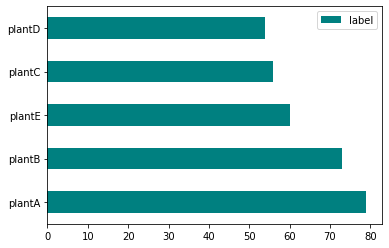

In [165]:
pd.DataFrame(conso['label'].value_counts()).plot(kind='barh', color='teal');

In [137]:
X = conso.iloc[:,:-1]
y = conso['label']
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y,
                                                    test_size=0.2, stratify=y)


In [138]:
def fit_and_predict(model, X_train, X_val, y_train, y_val, mode='c'):
    # fit model and measure the training elapsed time
    startTime = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - startTime

    # predict train data
    y_pred_train = model.predict(X_train)

    # predict test data
    startTime = time.time()
    y_pred = model.predict(X_val)
    test_time = time.time() - startTime
    
    if mode == "c":
        # generate scores
        a_train = model.score(X_train, y_train)
        a_test = model.score(X_val, y_val)
        p_train = precision_score(y_train, y_pred_train, average='weighted')
        r_train = recall_score(y_train, y_pred_train, average='weighted')
        f_train = f1_score(y_train, y_pred_train, average='weighted')
        p_test = precision_score(y_val, y_pred, average='weighted')
        r_test = recall_score(y_val, y_pred, average='weighted')
        f_test = f1_score(y_val, y_pred, average='weighted')

        fit_predict_results = [a_train, a_test,
                               p_train, p_test,
                               r_train, r_test,
                               f_train, f_test,
                               train_time, test_time]

    if mode == "r":
        # generate scores
        a_train = model.score(X_train, y_train),
        a_test = model.score(X_val, y_val),
        fit_predict_results = [a_train, a_test,
                               train_time, test_time]
    
    return fit_predict_results

In [142]:
baseline_model_instances = {
    'kNN': KNeighborsClassifier(n_neighbors=3),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=8)
}


cols_baseline = ['ML Method', 
                 'Train Accuracy', 'Val Accuracy',
                 'Train Precision', 'Train Recall', 'Train F1-score',
                 'Val Precision','Val Recall', 'Val F1-score',
                 'Training Time', 'Val Time']

df_results_baseline = pd.DataFrame(columns=cols_baseline)
ctr = 0
skf=StratifiedKFold(n_splits=4)
for m, model in notebook.tqdm(baseline_model_instances.items()):

    atrain = []
    atest = []
    ptrain = []
    ptest = []
    rtrain = []
    rtest = []
    ftrain = []
    ftest = []
    traintime = []
    testtime = []

    for train_index, val_index in skf.split(X_trainval, y_trainval):

        X_train, X_val = X_trainval.iloc[train_index], X_trainval.iloc[val_index]
        y_train, y_val = y_trainval.iloc[train_index], y_trainval.iloc[val_index]
        train_results = fit_and_predict(model,
                                        X_train, X_val,
                                        y_train, y_val,
                                        mode='c')

        atrain.append(train_results[0])
        atest.append(train_results[1])
        ptrain.append(train_results[2])
        ptest.append(train_results[3])
        rtrain.append(train_results[4])
        rtest.append(train_results[5])
        ftrain.append(train_results[6])
        ftest.append(train_results[7])
        traintime.append(train_results[8])
        testtime.append(train_results[9])        

    df_results_baseline.loc[ctr] = [m, 
                                            np.mean(atrain)*100,
                                            np.mean(atest)*100,
                                            np.mean(ptrain)*100,
                                            np.mean(ptest)*100,
                                            np.mean(rtrain)*100,
                                            np.mean(rtest)*100,
                                            np.mean(ftrain)*100,
                                            np.mean(ftest)*100,
                                            np.mean(traintime),
                                            np.mean(testtime)]
            
    ctr+=1

  0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\Kristine Ann\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Kristine Ann\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Kristine Ann\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Kristine Ann\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Kristine Ann\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsCla

In [143]:
df_results_baseline

,ML Method,Train Accuracy,Val Accuracy,Train Precision,Train Recall,Train F1-score,Val Precision,Val Recall,Val F1-score,Training Time,Val Time
0,kNN,67.689037,43.659674,68.490603,44.221829,67.689037,43.659674,67.285884,42.438275,0.001388,0.003241
1,Gradient Boosting Classifier,95.785583,83.152681,95.969464,85.465550,95.785583,83.152681,95.800661,83.077613,0.528833,0.001995


In [151]:
test_results = fit_and_predict(GradientBoostingClassifier(random_state=8), X_trainval, X_test, y_trainval, y_test)
test_cols = ['ML Method', 
             'Train Accuracy', 'Test Accuracy',
             'Train Precision', 'Train Recall', 'Train F1-score',
             'Test Precision','Test Recall', 'Test F1-score',
             'Training Time', 'Test Time']
df_results = pd.DataFrame(columns=test_cols)
df_results.loc[0] = ['Gradient Boosting Classifier'] + test_results
df_results

,ML Method,Train Accuracy,Test Accuracy,Train Precision,Train Recall,Train F1-score,Test Precision,Test Recall,Test F1-score,Training Time,Test Time
0,Gradient Boosting Classifier,0.954023,0.833333,0.955302,0.839364,0.954023,0.833333,0.954212,0.832472,0.611259,0.001994
